<a href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-24-yolov8_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ultralytics Yolov8 설치

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.8/702.8 kB 6.2 MB/s eta 0:00:00


# Inference 실행 해보기

In [2]:
import cv2
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # COCO dataset으로 pretrained된 model을 불러온다. 크기에 따라서 5개의 모델 존재(n, s, m, l, x)
#model = YOLO("yolov8n-seg.pt")

# Use the model
results = model("https://ultralytics.com/images/bus.jpg", conf = 0.6)  # ultralytics 패키지 내에 test용으로 이미 존재해 있는 버스 이미지를 이용해 object detection 수행

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.9MB/s]


100%|██████████| 476k/476k [00:00<00:00, 21.1MB/s]


image 1/1 /content/bus.jpg: 640x480 3 persons, 1 bus, 122.8ms
Speed: 11.7ms preprocess, 122.8ms inference, 726.7ms postprocess per image at shape (1, 3, 640, 480)


In [3]:
# print(results)

print(results[0])

print()

# print(results[0].cpu())
print(results[0].boxes) # 좌상단 좌표, 우하단 좌표, confidence score, class id

seg = results[0].masks
print(seg) # segmentation 정보



ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [4]:
print(len(seg.xy))

for i in range(len(seg.xy)):
  seg_list = seg.xy[i]
  result = seg_list[int(len(seg_list)/2)]

  print(seg_list)

AttributeError: 'NoneType' object has no attribute 'xy'

In [ ]:
import numpy as np

dst = seg.xy[0].copy()

shape = seg.orig_shape
print(shape)


(1080, 810)


In [ ]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chai

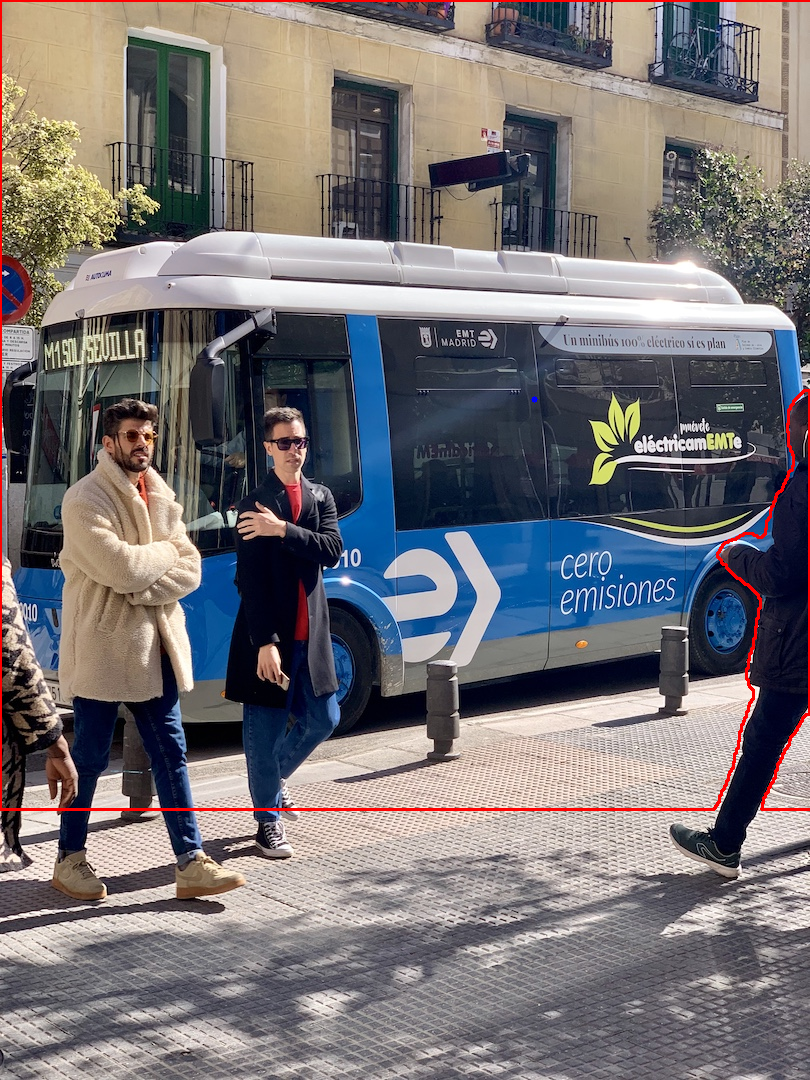

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # google의 자체 개발 라이브러리에서 cv2_imshow를 import

zero_mask = np.zeros((shape[1], shape[0])) # mask 정보는 2차원 선호
#masked_polygon = cv2.fillPoly(zero_mask, [seg.xy[0]], 1)
masked_polygon = cv2.fillPoly(zero_mask, np.int32([seg.xy[0]]), 255)
#cv2_imshow(masked_polygon)

#gray = cv2.cvtColor(seg.xy[0], cv2.COLOR_RGB2GRAY)
#ret, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
ret, binary = cv2.threshold(masked_polygon, 150, 255, cv2.THRESH_BINARY_INV)
#cv2_imshow(binary)

#contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(np.uint8(binary), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

dst = results[0].orig_img
for i in contours:
    M = cv2.moments(i)
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    cv2.circle(dst, (cX, cY), 3, (255, 0, 0), -1)
    cv2.drawContours(dst, [i], 0, (0, 0, 255), 2)

#cv2.imshow("dst", dst)
cv2_imshow(dst)

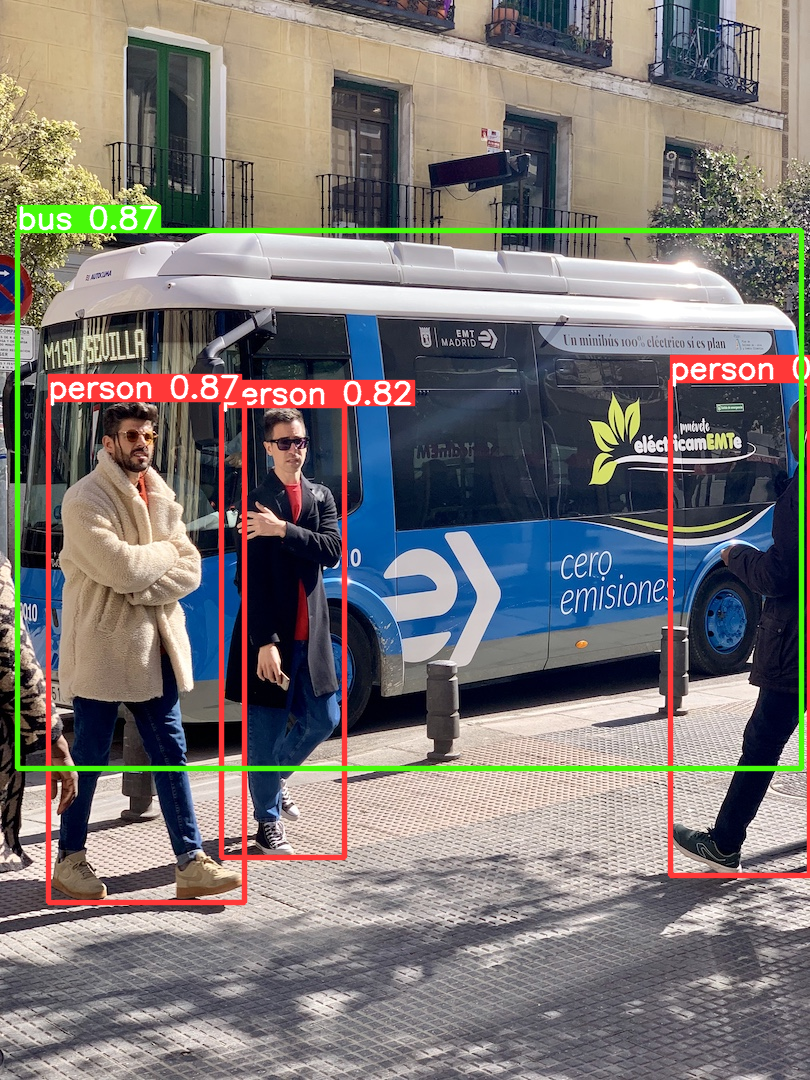

In [5]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # google의 자체 개발 라이브러리에서 cv2_imshow를 import

res_plotted = results[0].plot() # plot() 함수를 이용해서 이미지 내에 bounding box나 mask 등의 result 결과를 그릴 수 O
# print(res_plotted)

# plt.figure(figsize=(12, 12))
# plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
# plt.show()

cv2_imshow(res_plotted)


In [6]:
!mkdir /content/data
!wget -O /content/data/street01.jpg https://raw.githubusercontent.com/goodhsm2000/DL-YOLOv8_ex/main/street.jpg

--2024-01-24 08:28:23--  https://raw.githubusercontent.com/goodhsm2000/DL-YOLOv8_ex/main/street.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61771 (60K) [image/jpeg]
Saving to: ‘/content/data/street01.jpg’

/content/data/stree 100%[===================>]  60.32K  --.-KB/s    in 0.007s  

2024-01-24 08:28:23 (8.47 MB/s) - ‘/content/data/street01.jpg’ saved [61771/61771]




image 1/1 /content/data/street01.jpg: 448x640 6 persons, 1 bicycle, 1 car, 74.6ms
Speed: 3.1ms preprocess, 74.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


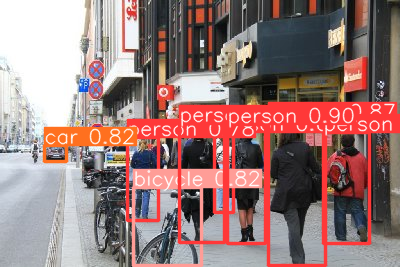

In [7]:
results2 = model("/content/data/street01.jpg", conf = 0.5, save = True, line_width = 1)
cv2_imshow(results2[0].plot())

# Coco128 데이터로 학습시켜보기기


In [8]:
model.train(data="coco128.yaml", epochs=5, imgsz=640)

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=5, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

100%|██████████| 6.66M/6.66M [00:00<00:00, 132MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 3795.15file/s]

Dataset download success ✅ (1.3s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 26.3MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 2089.50it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.73G      2.967      4.782      2.581        228        640: 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        128        929      0.184    0.00116   0.000296   7.74e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.62G      2.889       4.73      2.519        151        640: 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        128        929     0.0584   0.000887   0.000555   0.000161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.57G      2.908      4.562      2.521        164        640: 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        128        929     0.0291    0.00272   0.000656   0.000213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.62G      2.914      4.653      2.511        232        640: 100%|██████████| 8/8 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        128        929     0.0286    0.00366   0.000805   0.000309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.68G      2.858      4.722      2.441        249        640: 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        128        929     0.0142    0.00555    0.00103   0.000398



5 epochs completed in 0.009 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


                   all        128        929     0.0142    0.00555    0.00103   0.000399
                person        128        254     0.0101      0.394     0.0564     0.0243
               bicycle        128          6          0          0          0          0
                   car        128         46          0          0          0          0
            motorcycle        128          5          0          0          0          0
              airplane        128          6          0          0          0          0
                   bus        128          7          0          0          0          0
                 train        128          3          0          0          0          0
                 truck        128         12          0          0          0          0
                  boat        128          6          0          0          0          0
         traffic light        128         14          0          0          0          0
             stop sig

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7934e4f32c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

# fish image dataset으로 학습시켜 테스트해보기


In [11]:
# Google Drive 접근을 위한 Mount 적용.
import os, sys
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [19]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# soft link로 Google Drive Directory 연결.
!ln -s /content/gdrive/MyDrive/ /mydrive
!ls /mydrive

 01_1_intro.ppt
 12_database.ppt
'1517713630850 (1).gdoc'
 1517713630850.gdoc
'1회(최종고).hwp.gdoc'
'2009년도 연차보고서_교과영역.hwp'
'2012년 여름 유럽 여행기.hwp'
 2013년_KCC2010_교과과정_20130106.hwp
 2013년_KCC2010_교과과정.hwp
 2013년_KCC2010_교육개선_교과과정_20130107.hwp
'2013년 KCC2010 자체평가보고서 양식(변경).zip'
 2013년.zip
 2014논문.zip
'2016-1 강의 배정표.hwp'
'2022-1 지도교수세미나 공고.pdf'
 2022-LJM-QA.01-캡스톤디자인II-O분반-O조.xlsx
 22-%20Logistic%20regression%202006.gslides
 359131.pdf
 4._지침_및_양식_-_교내일반연구과제_정산.hwp
'6. 성적향상장학금 연계 학습지원 프로그램 안내.hwp - 한글.pdf'
 ActivityHeightMap.smali
'After Crying [Hungary] - Live.gdoc'
 ai.zip
 amikey-0.1.3.tar.gz
 amj.smali
 ane.smali
 AR81Family-linux-v1.0.1.14.tar.gz
 attachment_f6197bdd_7a271b43_8caaa4f2_0e9207c7_7cb21c33.gdoc
 AuthorsKit.zip
 average.xlsx
'Base files.rar'
 beevm_091027.tar.gz
 BLE_CC254x_140.zip
'BLE-CC41-A Manual.pdf'

In [20]:
!mkdir "/mydrive/ultra_workdir"

In [21]:
!wget -O /content/data/fishdata.zip https://raw.githubusercontent.com/goodhsm2000/DL-YOLOv8_ex/main/Fish.v44i.yolov8.zip
!cd /content/data; unzip fishdata.zip

--2024-01-24 08:35:55--  https://raw.githubusercontent.com/goodhsm2000/DL-YOLOv8_ex/main/Fish.v44i.yolov8.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10263078 (9.8M) [application/zip]
Saving to: ‘/content/data/fishdata.zip’

/content/data/fishd 100%[===================>]   9.79M  --.-KB/s    in 0.07s   

2024-01-24 08:35:56 (148 MB/s) - ‘/content/data/fishdata.zip’ saved [10263078/10263078]

Archive:  fishdata.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/FishDataset119_png.rf.284121324d9226b1cac95b514b4938f2.jpg  
 extracting: test/images/FishDataset12_png.rf.d4e77f24b058cbd5bccdb2ea0f03c043.jpg  
 extracting:

In [22]:
model = YOLO("yolov8n.pt")

model.train(data = "/content/data/data.yaml", epochs = 15, imgsz = 640, project = "/content/gdrive/MyDrive/ultra_workdir", name= "fish", exist_ok = True)

# !yolo detect train data=/content/data/data.yaml model=yolov8n.pt epochs=15 imgsz=640 project=/content/gdrive/MyDrive/ultra_workdir name= fish

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data/data.yaml, epochs=15, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/gdrive/MyDrive/ultra_workdir, name=fish, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/data/train/labels... 476 images, 0 backgrounds, 0 corrupt: 100%|██████████| 476/476 [00:00<00:00, 1814.24it/s]

train: New cache created: /content/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/data/valid/labels... 136 images, 0 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<00:00, 802.05it/s]

val: New cache created: /content/data/valid/labels.cache


Plotting labels to /content/gdrive/MyDrive/ultra_workdir/fish/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/gdrive/MyDrive/ultra_workdir/fish
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.45G      1.352       3.93      1.535         63        640: 100%|██████████| 30/30 [00:13<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        136        330     0.0245      0.681      0.124     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.41G      1.282      3.258      1.488         48        640: 100%|██████████| 30/30 [00:09<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]

                   all        136        330      0.601     0.0944      0.167      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.42G      1.254      2.805      1.472        114        640: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        136        330      0.455      0.284      0.239      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      2.43G      1.323      2.537      1.493         67        640: 100%|██████████| 30/30 [00:08<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]


                   all        136        330      0.531      0.309       0.31      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.43G      1.268      2.358      1.453         48        640: 100%|██████████| 30/30 [00:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]

                   all        136        330      0.575      0.356      0.343      0.211


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.76G      1.248      2.748      1.499         14        640: 100%|██████████| 30/30 [00:10<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]

                   all        136        330      0.482      0.304      0.237      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15       2.4G      1.191      2.545      1.442         16        640: 100%|██████████| 30/30 [00:08<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]

                   all        136        330      0.653      0.393      0.378      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15       2.4G       1.19      2.406      1.428         34        640: 100%|██████████| 30/30 [00:08<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]

                   all        136        330      0.636      0.423      0.441      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15       2.4G      1.134       2.23      1.384         30        640: 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]


                   all        136        330      0.654      0.418      0.426      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.41G       1.08      2.149      1.336         16        640: 100%|██████████| 30/30 [00:07<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]

                   all        136        330      0.748      0.368      0.443      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15       2.3G      1.066      2.009      1.315         23        640: 100%|██████████| 30/30 [00:08<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all        136        330      0.817      0.415      0.503      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.41G      1.026      1.982      1.274         19        640: 100%|██████████| 30/30 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]

                   all        136        330      0.786      0.442      0.531      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      2.29G      1.007      1.882      1.276         20        640: 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        136        330      0.779      0.464      0.551      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.41G     0.9986      1.819      1.253         27        640: 100%|██████████| 30/30 [00:07<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.53it/s]

                   all        136        330      0.784      0.479      0.564      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15       2.4G     0.9728      1.789       1.25         43        640: 100%|██████████| 30/30 [00:08<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all        136        330      0.756       0.52       0.56      0.385



15 epochs completed in 0.048 hours.
Optimizer stripped from /content/gdrive/MyDrive/ultra_workdir/fish/weights/last.pt, 6.3MB
Optimizer stripped from /content/gdrive/MyDrive/ultra_workdir/fish/weights/best.pt, 6.3MB

Validating /content/gdrive/MyDrive/ultra_workdir/fish/weights/best.pt...
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


                   all        136        330      0.784      0.479      0.564       0.39
Acanthuridae -Surgeonfishes-        136        112      0.678      0.705      0.703      0.437
    Carangidae -Jacks-        136         46      0.599      0.478      0.559      0.377
     Labridae -Wrasse-        136          1          1          0          0          0
 Lutjanidae -Snappers-        136         62      0.794      0.565      0.717      0.464
Scaridae -Parrotfishes-        136         21      0.741      0.546      0.689      0.527
    Scombridae -Tunas-        136         23      0.686      0.913      0.869      0.673
 Serranidae -Groupers-        136         30      0.706        0.4      0.656      0.411
 Shark -Selachimorpha-        136         34      0.849      0.706      0.775      0.543
Zanclidae -Moorish Idol-        136          1          1          0      0.111     0.0774
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /c

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  2,  4,  5,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x793328d151e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046, 


image 1/1 /content/data/test/images/FishDataset508_png.rf.9c62c3be09fa9f6422f7f2c5e477ac1f.jpg: 416x640 1 Scombridae -Tunas-, 1 Shark -Selachimorpha-, 237.4ms
Speed: 2.4ms preprocess, 237.4ms inference, 2.9ms postprocess per image at shape (1, 3, 416, 640)


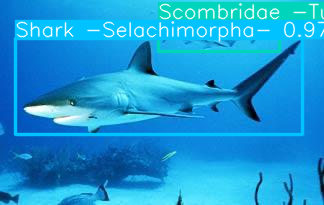

In [23]:
model = YOLO("/content/gdrive/MyDrive/ultra_workdir/fish/weights/best.pt")

results = model.predict("/content/data/test/images/FishDataset508_png.rf.9c62c3be09fa9f6422f7f2c5e477ac1f.jpg", line_width = 2)

res_plot = results[0].plot()

cv2_imshow(res_plot) # 결과 출력하기